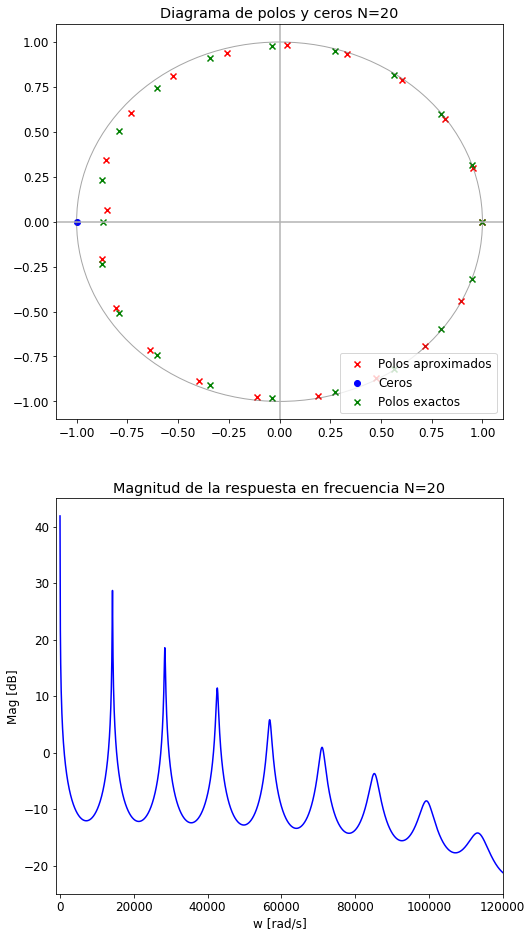

In [96]:
# Analisis de polos y ceros de Karplus Strong basico
# H(z) = RL/2(z+1)/(2z^{N+1}-RL(z+1))
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import cmath

plt.rcParams['figure.figsize'] = [8, 16]
plt.rcParams.update({'font.size': 12})

def plot_zp(zeros, poles, ax, polesTeo = None):
    unit_circle = plt.Circle((0,0), 1, color='0.3', fill=False, alpha=0.5)
    ax.add_artist(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    x_1 = zeros.real
    y_1 = zeros.imag
    x_2 = poles.real
    y_2 = poles.imag
    if polesTeo is not None:
        x_3 = polesTeo.real
        y_3 = polesTeo.imag
        ax.scatter(x_3, y_3, marker='x', color='r', label='Polos aproximados')
    ax.scatter(x_1, y_1, marker='o', color='b', label='Ceros')
    ax.scatter(x_2, y_2, marker='x', color='g', label='Polos exactos')
    r = 1.1 * np.amax(np.concatenate((abs(zeros), abs(poles), [1])))
    # plt.axis('scaled')
    ax.set_xlim([-r, r])
    ax.set_ylim([-r, r])
    # ax.spines['left'].set_position('zero')
    # ax.spines['right'].set_color('none')
    # ax.spines['bottom'].set_position('zero')
    # ax.spines['top'].set_color('none')
    ax.set_title('Diagrama de polos y ceros N=20')
    ax.legend(loc='lower right')

# Ganancia de lazo
RL = 0.996

# Tamaño del buffer
N = 20

# Frecuencia de muestreo
fs = 44100

num = [RL/2, RL/2]
den = np.zeros(N+1)
den[0] = 2
den[-1] = -RL
den[-2] = -RL

transfer_function = signal.TransferFunction(num, den, dt=1/fs)
zeros = transfer_function.zeros
poles = transfer_function.poles

fig,(ax1, ax2) = plt.subplots(2,1)
poles_aprox = np.asarray([np.power(RL*np.abs(np.cos(2*n*np.pi/(2*N+1))), 1/(N+0.5))*cmath.exp(1j*2*n*np.pi/(N+.5)) for n in range(N) ])
plot_zp(zeros, poles, ax1, poles_aprox)
# Pad the saved area by 10% in the x-direction and 20% in the y-direction
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('Basico_zp.png', bbox_inches=extent.expanded(1.1, 1.2))

w, mag, phase = transfer_function.bode(n=3000)
ax2.plot(w, mag, color='b')
ax2.set_title('Magnitud de la respuesta en frecuencia N=20')
ax2.set_xlabel('w [rad/s]')
ax2.set_ylabel('Mag [dB]')
ax2.set_xlim([-1000,120000])
ax2.set_ylim([-25,45])
extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('Basico_freqresp.png', bbox_inches=extent.expanded(1.3, 1.2))

plt.show()